The second mission that we collected data for was the Pioneer mission, which consisted of two satelites that were launched away from the Earth towards the edge of the solar system. For this mission we had to time-shift individual data points at a time due to Pioneer's constantly changing distance, but the data fields matched with OMNI more closely, so we only had to merge 2 datasets for this mission.

We calculate a new time based upon subtracting a number of hours from the Pioneer time and then merge it with the OMNI time. All plots are based off of the time at Pioneer, however. The number of hours subtracted is based on the following equation: hours = 41,555 * (PIONEER_Dist - 1) / (PIONEER_SW_SPEED). 45,555 is essentially a conversion factor to convert the speed units into AU/hr from km/s.


Text(0, 0.5, 'Au')

<Figure size 432x288 with 0 Axes>

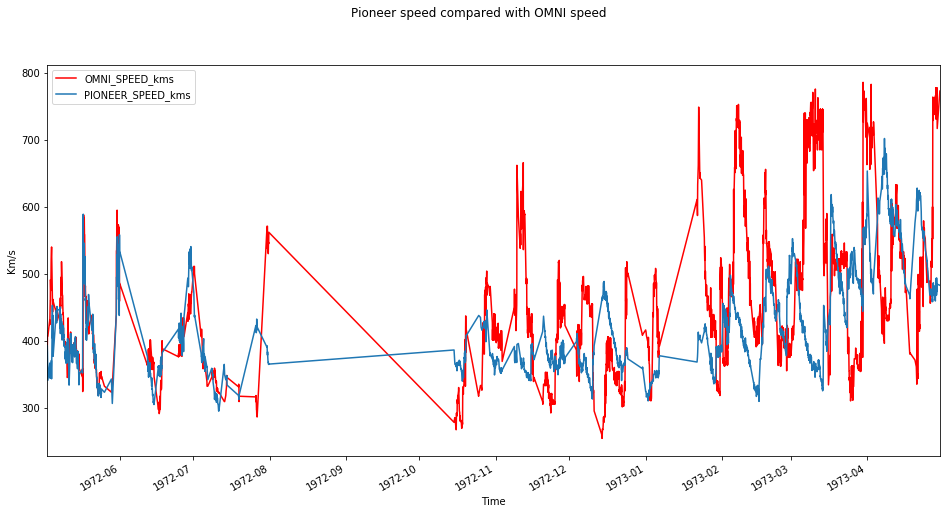

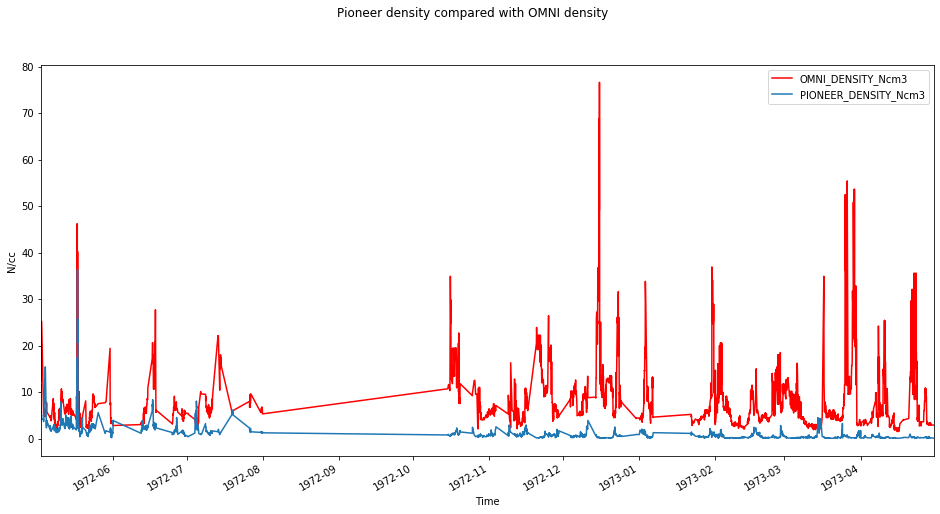

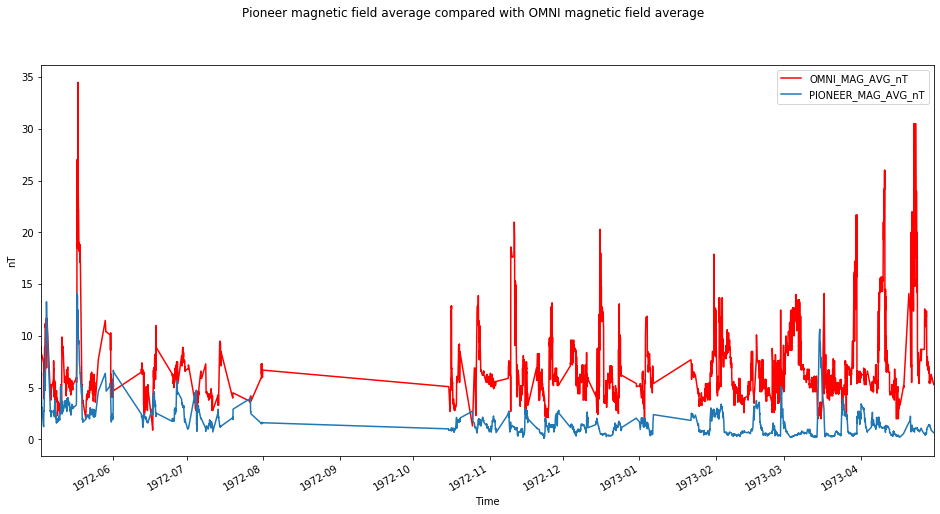

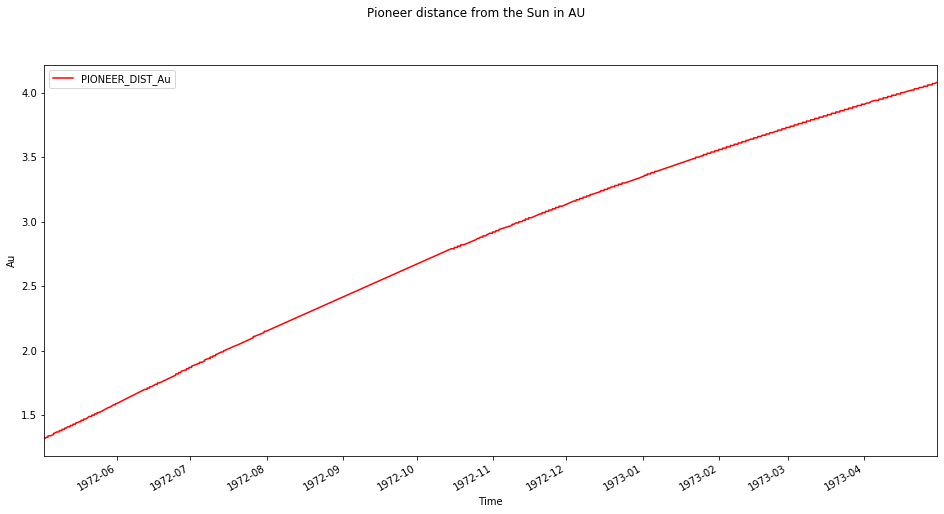

In [13]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From Pioneer  05/01/1972 to 05/01/1973")

df = pd.read_csv('csv files/SW4Pioneer1Year.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.PIONEER_DIST_Au != -1.0E+31]
df = df[df.PIONEER_LAT_deg != -1.0E+31]
df = df[df.PIONEER_LONG_deg != -1.0E+31]
df = df[df.PIONEER_BR_nT != -1.0E+31]
df = df[df.PIONEER_BT_nT != -1.0E+31]
df = df[df.PIONEER_BN_nT != -1.0E+31]
df = df[df.PIONEER_MAG_AVG_nT != -1.0E+31]
df = df[df.PIONEER_SPEED_kms != -1.0E+31]
df = df[df.PIONEER_DENSITY_Ncm3 != -1.0E+31]
df = df[df.PIONEER_TEMP_DegK != -1.0E+31]

df2 = pd.read_csv('csv files/Omni4Pioneer1Year.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df2 = df2[df2.OMNI_LAT_deg != -1.0E+31]
df2 = df2[df2.OMNI_LONG_deg != -1.0E+31]
df2 = df2[df2.OMNI_BR_nT != -1.0E+31]
df2 = df2[df2.OMNI_BT_nT != -1.0E+31]
df2 = df2[df2.OMNI_BN_nT != -1.0E+31]
df2 = df2[df2.OMNI_MAG_AVG_nT != -1.0E+31]
df2 = df2[df2.OMNI_SPEED_kms != -1.0E+31]
df2 = df2[df2.OMNI_DENSITY_Ncm3 != -1.0E+31]
df2 = df2[df2.OMNI_TEMP_DegK != -1.0E+31]

df.rename(columns = {'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ':'Time'}, inplace = True)

df['Time_offset_hours'] = df.apply(lambda row: int(round(41555 * (row.PIONEER_DIST_Au - 1) / row.PIONEER_SPEED_kms)), axis = 1)
df['new_time'] = df.apply(lambda row: row.Time - pd.Timedelta(hours = row.Time_offset_hours), axis = 1)


mF0 = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF0 = mF0.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
plt.ylabel("Km/s")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_DENSITY_Ncm3', ax=ax)
plt.ylabel("N/cc")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_MAG_AVG_nT', ax=ax)
plt.ylabel("nT")

fig4 = plt.figure(figsize=(16, 8))
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='PIONEER_DIST_Au', color='red', ax=ax)
plt.ylabel("Au")

Similarly to the Artemis mission, we calculated the scaled density and magnetic average as well as the longitude and latitude differences, which were more significant for Pioneer because there is a larger range of values for distance and position. 

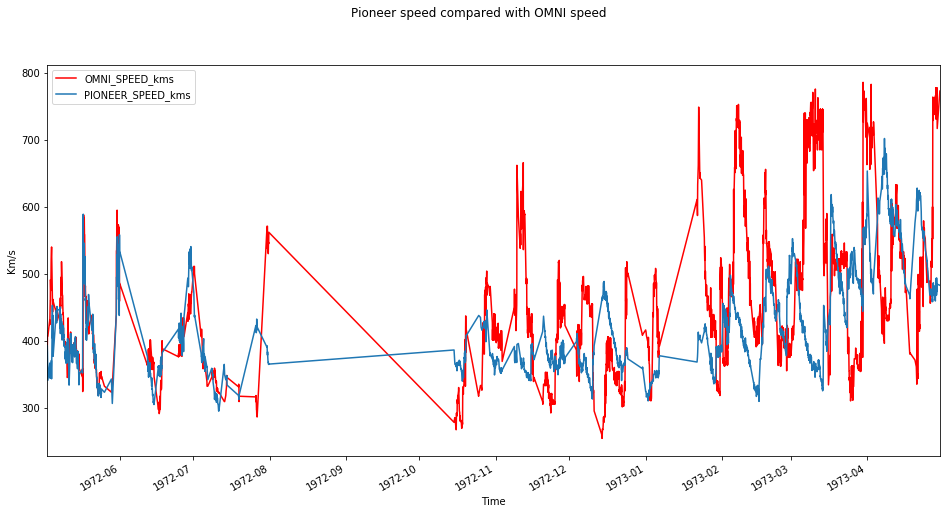

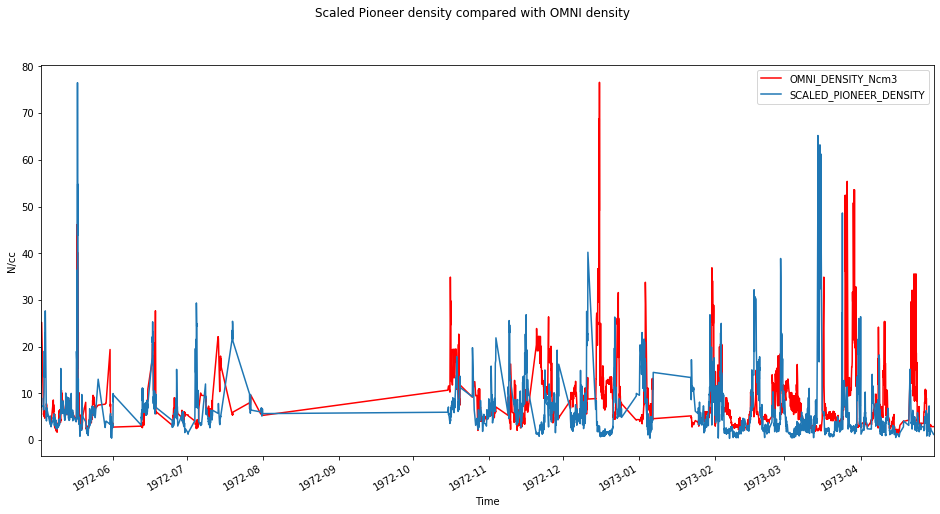

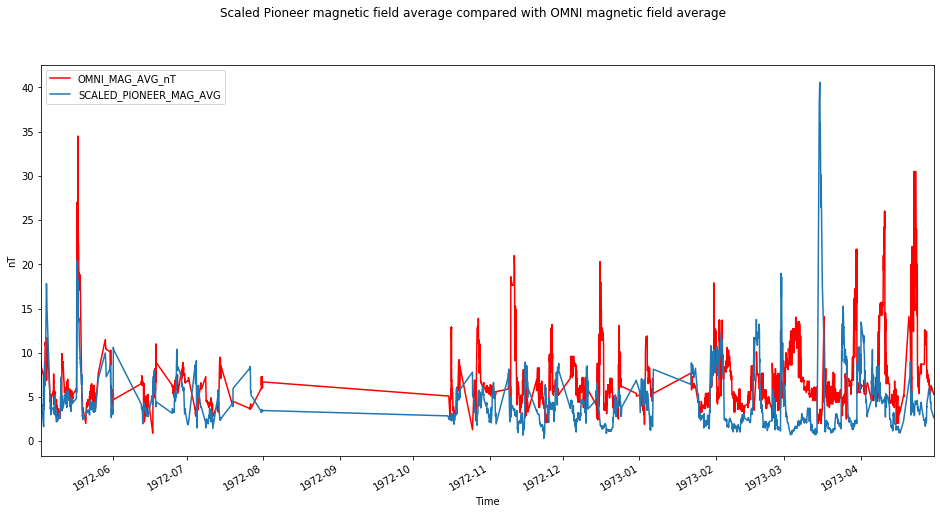

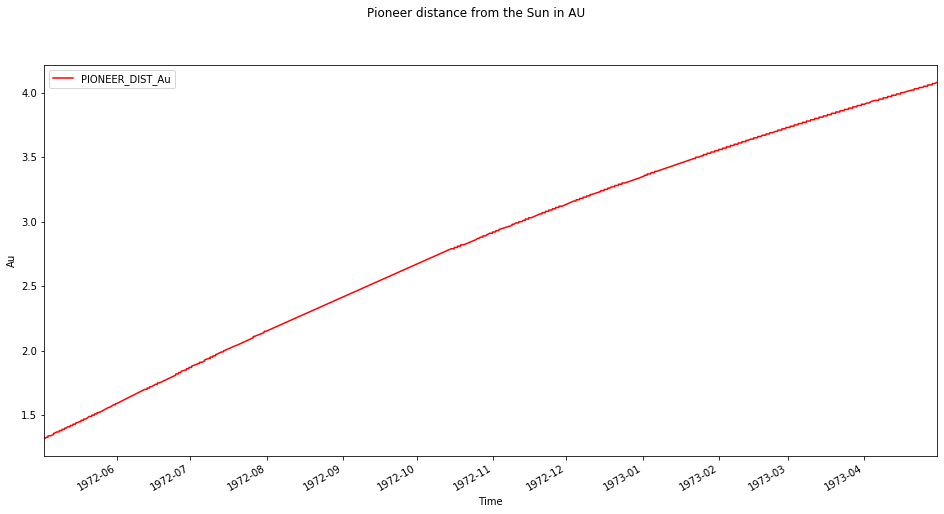

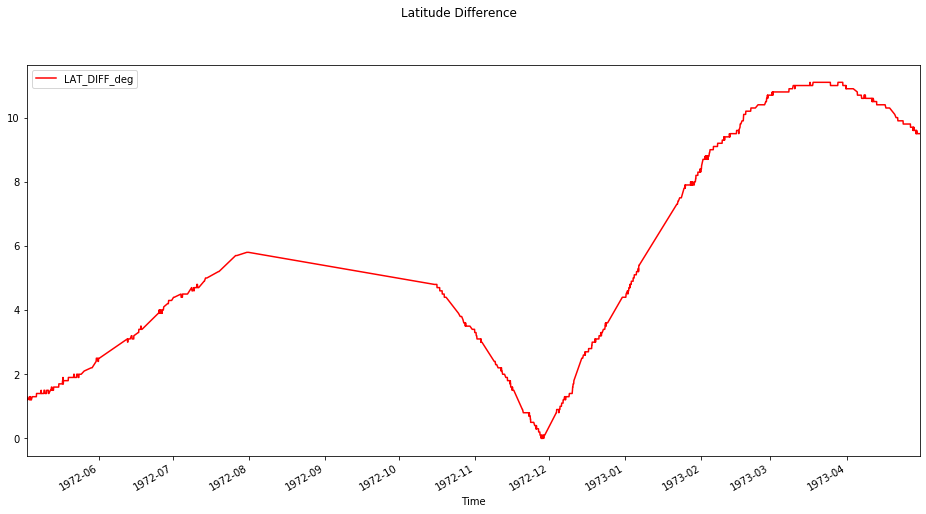

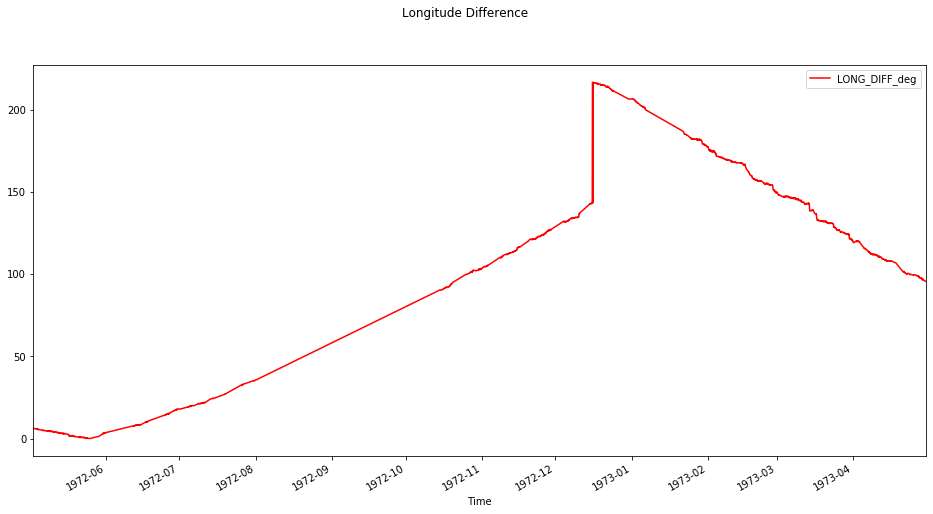

In [2]:
mF0['LAT_DIFF_deg'] = mF0.apply(lambda row: abs(row.OMNI_LAT_deg - row.PIONEER_LAT_deg), axis = 1)
mF0['LONG_DIFF_deg'] = mF0.apply(lambda row: abs(row.OMNI_LONG_deg - row.PIONEER_LONG_deg), axis = 1) 
mF0['SCALED_PIONEER_DENSITY'] = mF0.apply(lambda row: row.PIONEER_DENSITY_Ncm3 * row.PIONEER_DIST_Au * row.PIONEER_DIST_Au, axis = 1)
mF0['SCALED_PIONEER_MAG_AVG'] = mF0.apply(lambda row: row.PIONEER_MAG_AVG_nT * row.PIONEER_DIST_Au, axis = 1)

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
plt.ylabel("Km/s")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Pioneer density compared with OMNI density")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='SCALED_PIONEER_DENSITY', ax=ax)
plt.ylabel("N/cc")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='SCALED_PIONEER_MAG_AVG', ax=ax)
plt.ylabel("nT")

fig4 = plt.figure(figsize=(16, 8))
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='PIONEER_DIST_Au', color='red', ax=ax)
plt.ylabel("Au")

fig5 = plt.figure(figsize=(16, 8))
fig5.suptitle("Latitude Difference")
az = plt.gca()
mF0.plot(kind='line', x='Time', y='LAT_DIFF_deg', color='red', ax=az)


fig6 = plt.figure(figsize=(16, 8))
fig6.suptitle("Longitude Difference")
az = plt.gca()
mF0.plot(kind='line', x='Time', y='LONG_DIFF_deg', color='red', ax=az)

Additionally, we calculated how the differences in the solar wind variables were affected by the latitude, longitude, and distance differences between Pioneer and OMNI.

C:\Users\Ian\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


Text(0, 0.5, 'nT Difference')

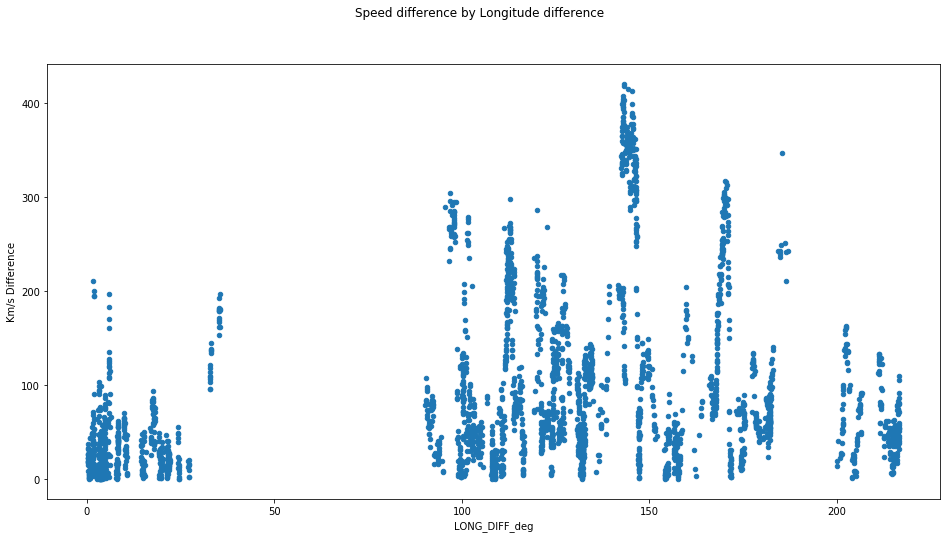

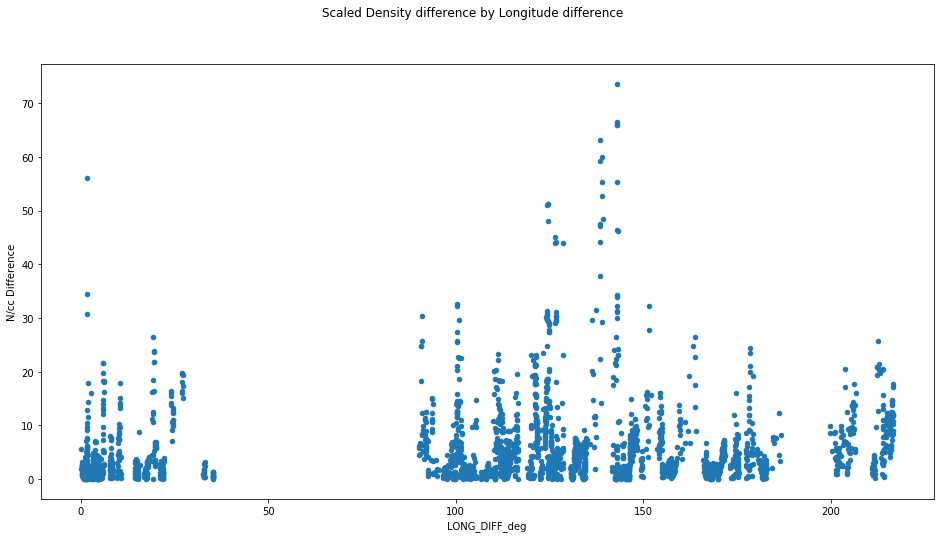

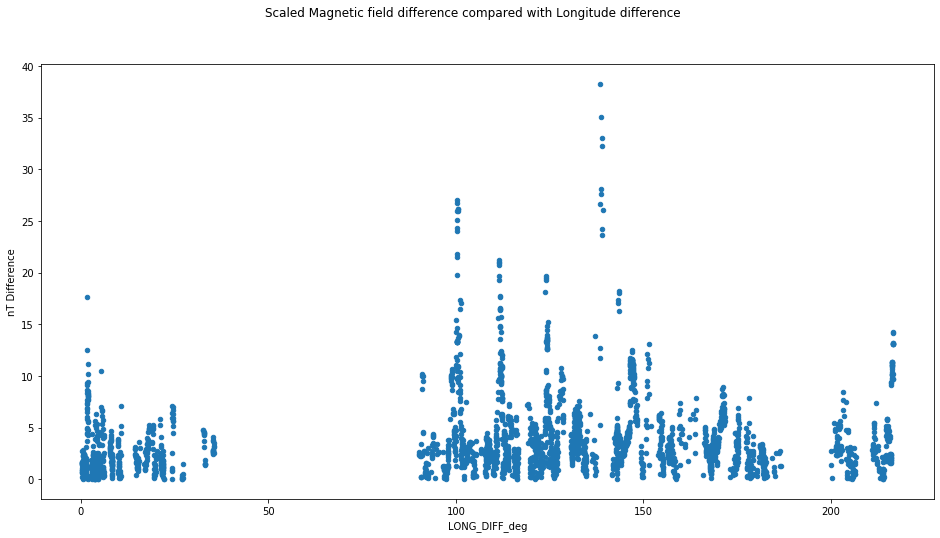

In [3]:
mF0['Speed_DIFF_Kms'] = mF0.apply(lambda row: abs(row.OMNI_SPEED_kms - row.PIONEER_SPEED_kms), axis = 1)
mF0['Density_DIFF_Ncc'] = mF0.apply(lambda row: abs(row.OMNI_DENSITY_Ncm3 - row.SCALED_PIONEER_DENSITY), axis = 1)
mF0['Mag_DIFF_nT'] = mF0.apply(lambda row: abs(row.OMNI_MAG_AVG_nT - row.SCALED_PIONEER_MAG_AVG), axis = 1)

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Longitude difference")
ax = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Longitude difference")
ay = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Longitude difference")
az = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

Text(0, 0.5, 'nT Difference')

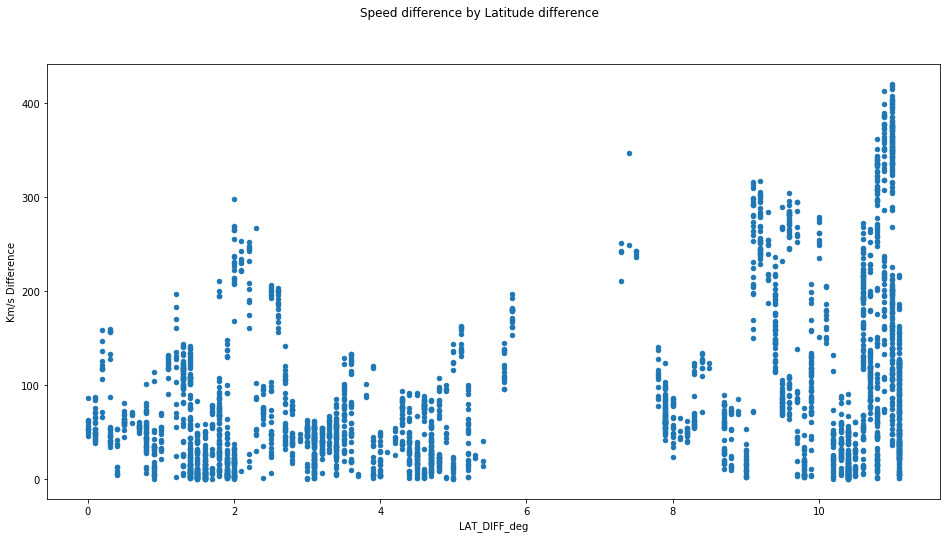

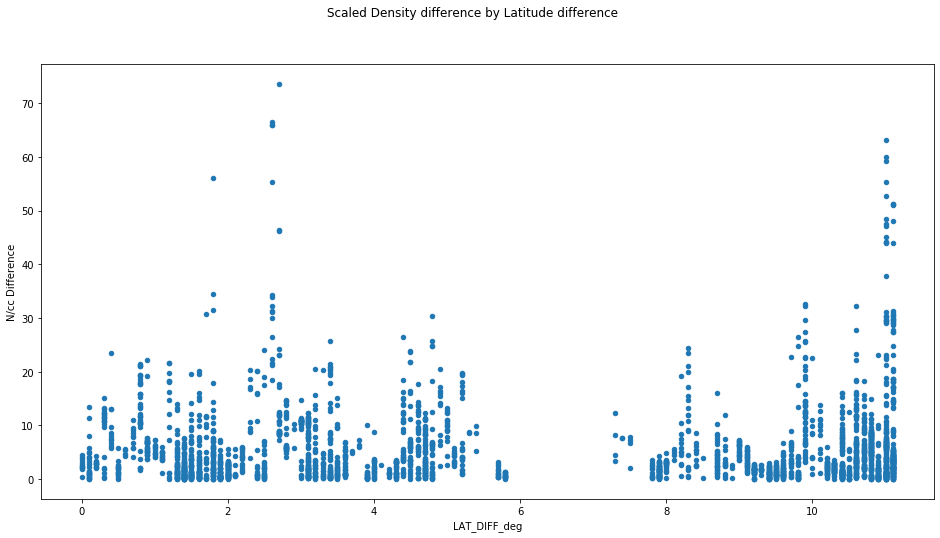

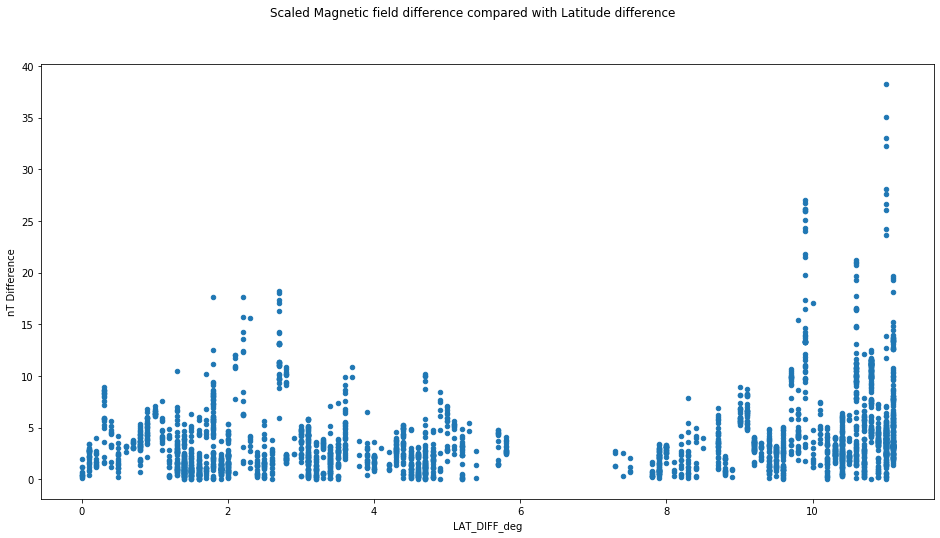

In [4]:
fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Latitude difference")
ax = plt.gca()
mF0.plot(kind='scatter', x='LAT_DIFF_deg', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Latitude difference")
ay = plt.gca()
mF0.plot(kind='scatter', x='LAT_DIFF_deg', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Latitude difference")
az = plt.gca()
mF0.plot(kind='scatter', x='LAT_DIFF_deg', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

Text(0, 0.5, 'nT Difference')

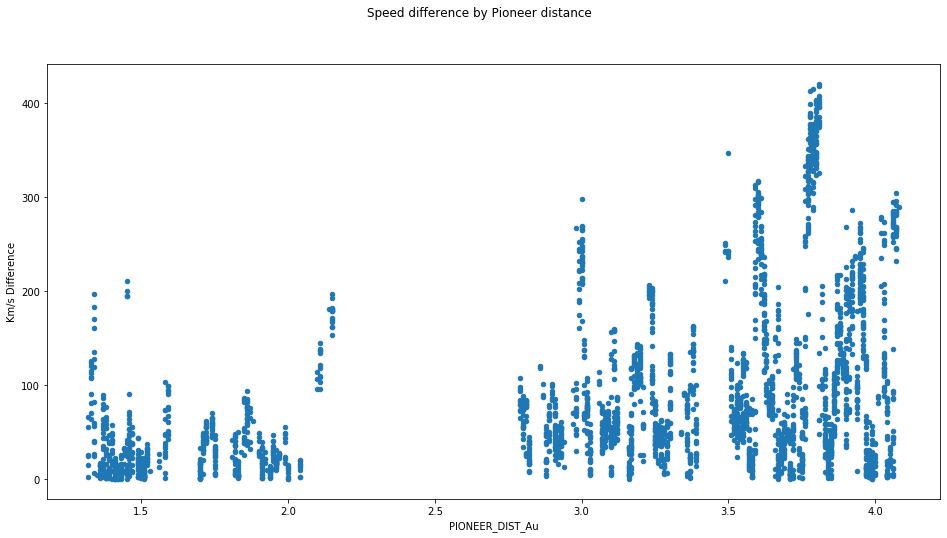

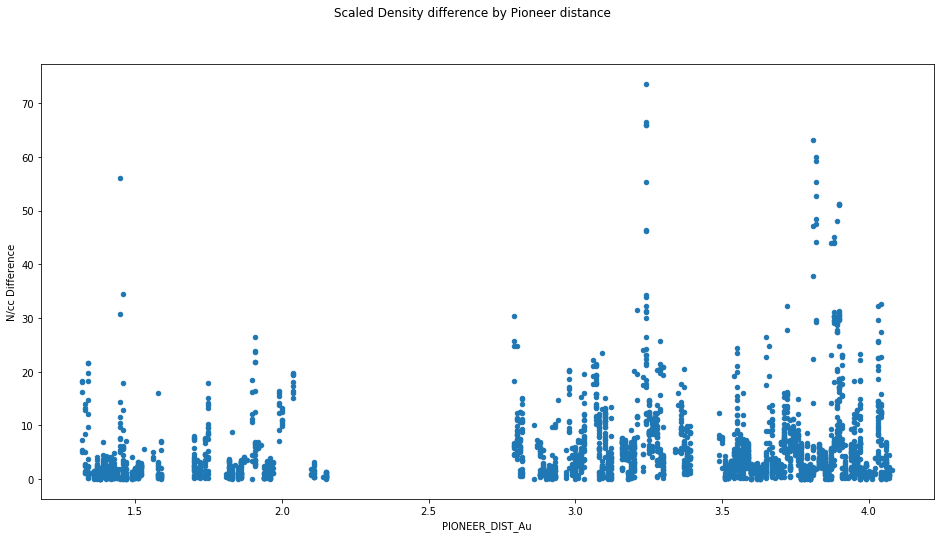

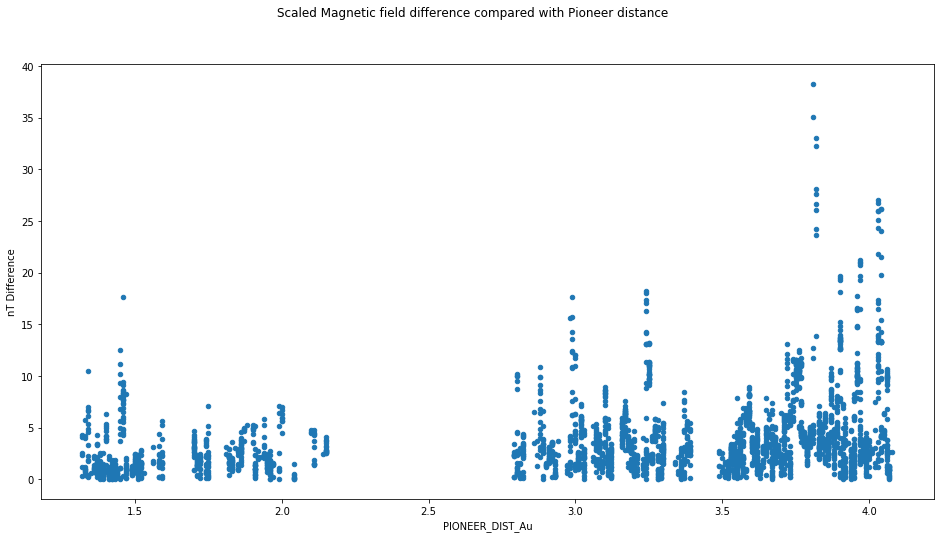

In [5]:
fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Pioneer distance")
ax = plt.gca()
mF0.plot(kind='scatter', x='PIONEER_DIST_Au', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Pioneer distance")
ay = plt.gca()
mF0.plot(kind='scatter', x='PIONEER_DIST_Au', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Pioneer distance")
az = plt.gca()
mF0.plot(kind='scatter', x='PIONEER_DIST_Au', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

#mF0.to_csv('Pioneer1Year.csv')

For the second year of Pioneer data, we used the second satelite that was launched in order to get more data in the range of the Psyche asteroid.

Text(0, 0.5, 'Au')

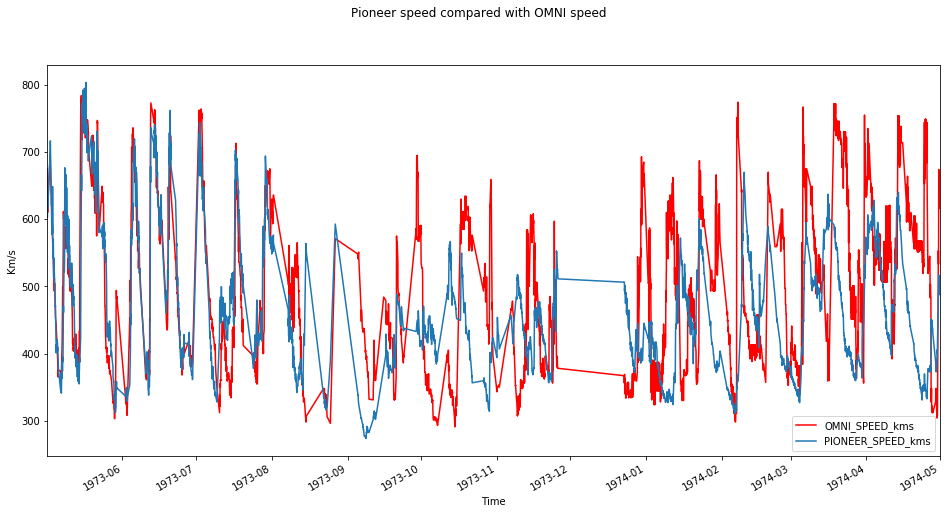

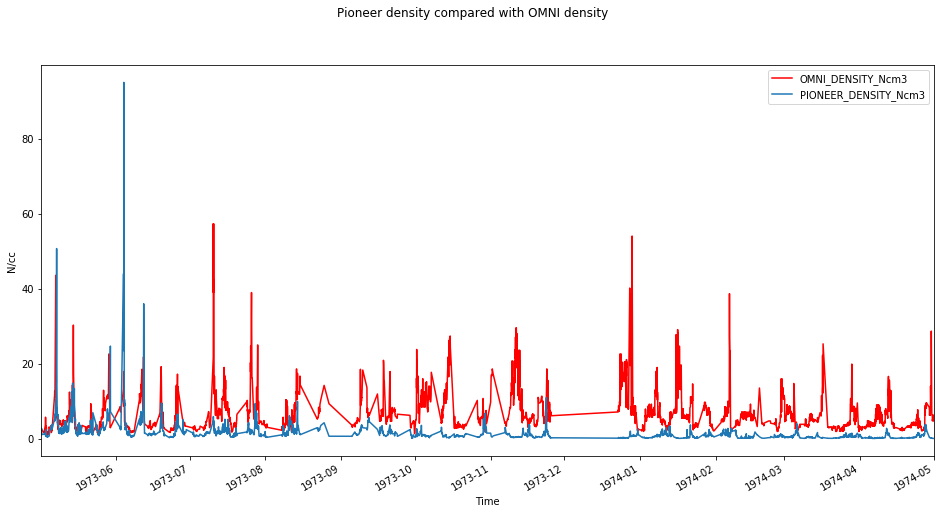

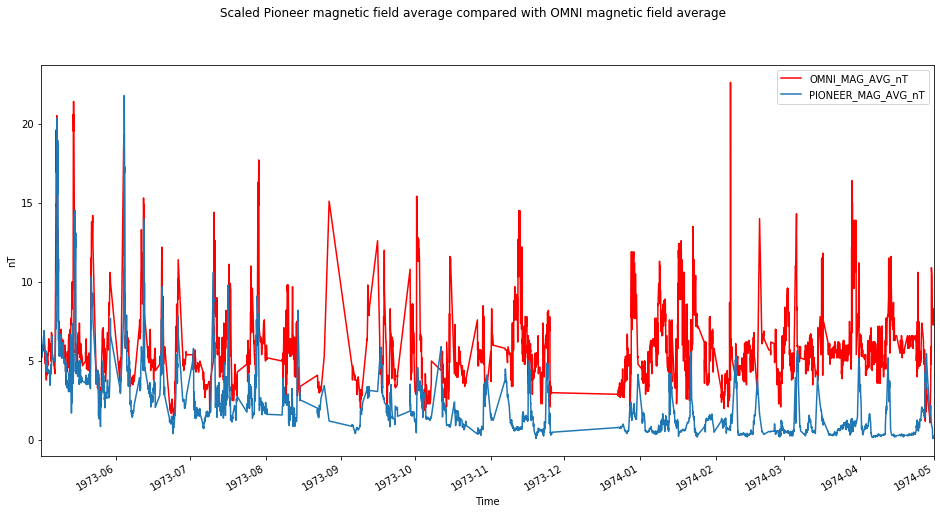

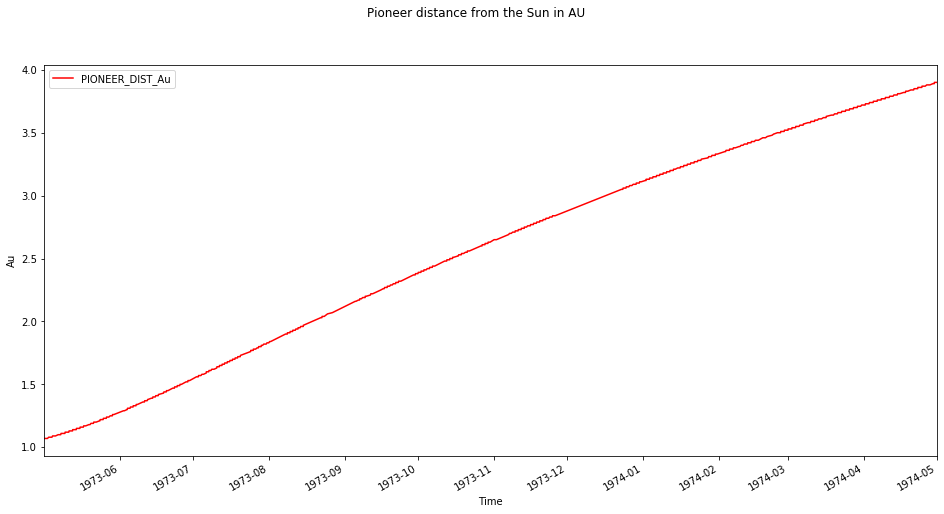

In [6]:
df = pd.read_csv('csv files/SW4Pioneer1Year2.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.PIONEER_DIST_Au != -1.0E+31]
df = df[df.PIONEER_LAT_deg != -1.0E+31]
df = df[df.PIONEER_LONG_deg != -1.0E+31]
df = df[df.PIONEER_BR_nT != -1.0E+31]
df = df[df.PIONEER_BT_nT != -1.0E+31]
df = df[df.PIONEER_BN_nT != -1.0E+31]
df = df[df.PIONEER_MAG_AVG_nT != -1.0E+31]
df = df[df.PIONEER_SPEED_kms != -1.0E+31]
df = df[df.PIONEER_DENSITY_Ncm3 != -1.0E+31]
df = df[df.PIONEER_TEMP_DegK != -1.0E+31]

df2 = pd.read_csv('csv files/Omni4Pioneer1Year2.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df2 = df2[df2.OMNI_LAT_deg != -1.0E+31]
df2 = df2[df2.OMNI_LONG_deg != -1.0E+31]
df2 = df2[df2.OMNI_BR_nT != -1.0E+31]
df2 = df2[df2.OMNI_BT_nT != -1.0E+31]
df2 = df2[df2.OMNI_BN_nT != -1.0E+31]
df2 = df2[df2.OMNI_MAG_AVG_nT != -1.0E+31]
df2 = df2[df2.OMNI_SPEED_kms != -1.0E+31]
df2 = df2[df2.OMNI_DENSITY_Ncm3 != -1.0E+31]
df2 = df2[df2.OMNI_TEMP_DegK != -1.0E+31]

df.rename(columns = {'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ':'Time'}, inplace = True)

df['Time_offset_hours'] = df.apply(lambda row: int(round(41555 * (row.PIONEER_DIST_Au - 1) / row.PIONEER_SPEED_kms)), axis = 1)
df['new_time'] = df.apply(lambda row: row.Time - pd.Timedelta(hours = row.Time_offset_hours), axis = 1)


mF0 = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF0 = mF0.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
plt.ylabel("Km/s")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_DENSITY_Ncm3', ax=ax)
plt.ylabel("N/cc")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_MAG_AVG_nT', ax=ax)
plt.ylabel("nT")

fig4 = plt.figure(figsize=(16, 8))
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='PIONEER_DIST_Au', color='red', ax=ax)
plt.ylabel("Au")

Here are the plots for the scaled density and magnetic average. 

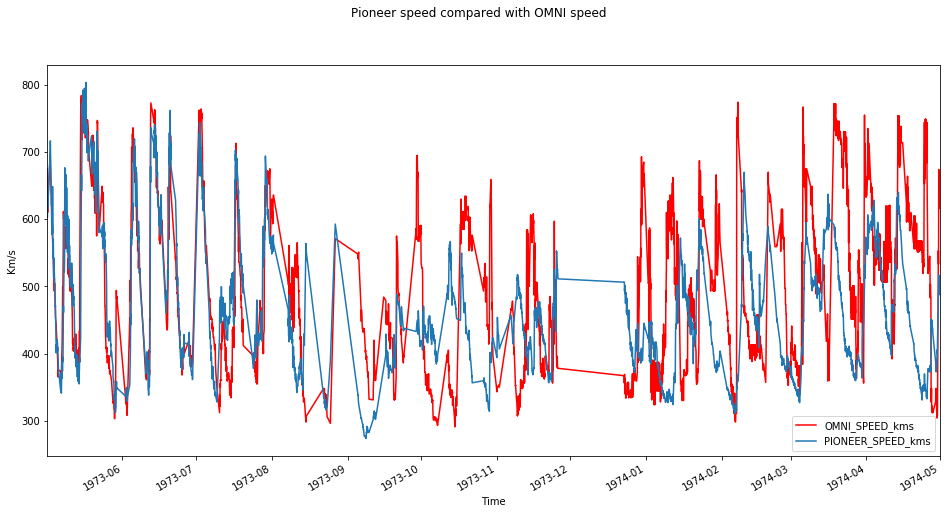

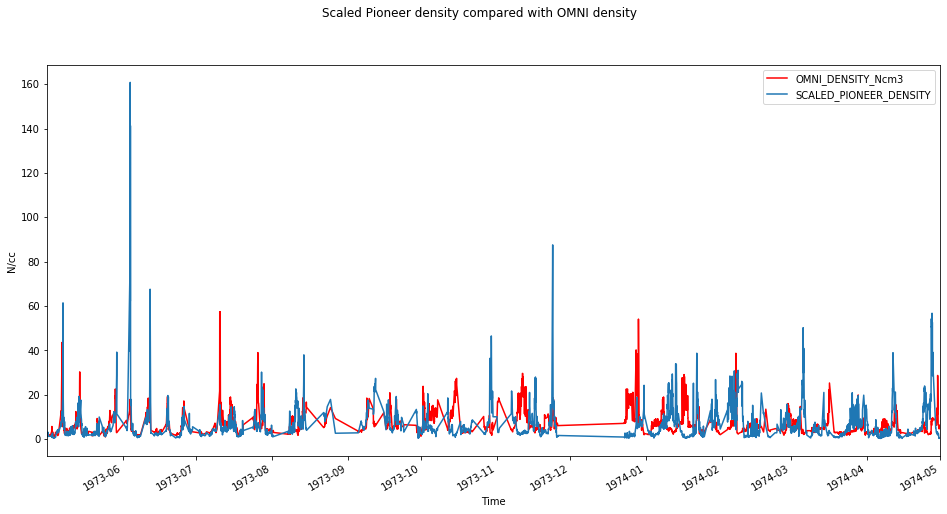

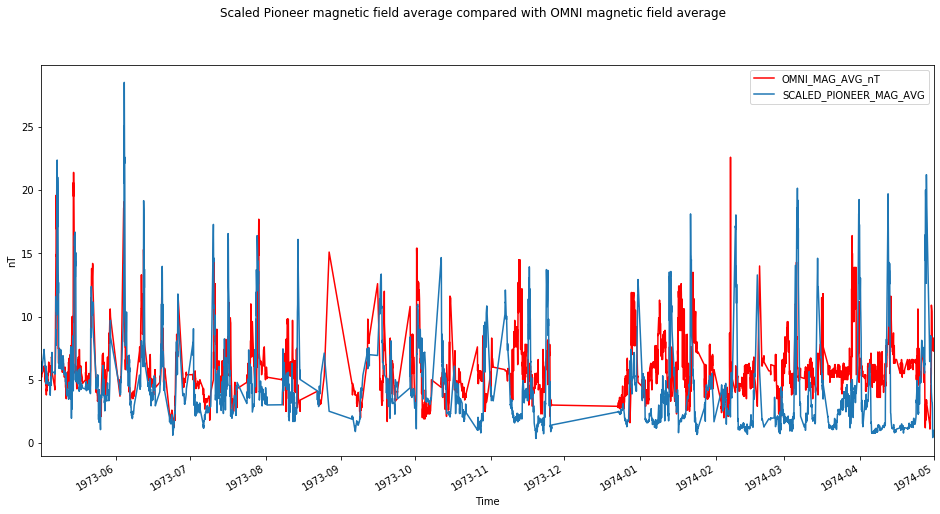

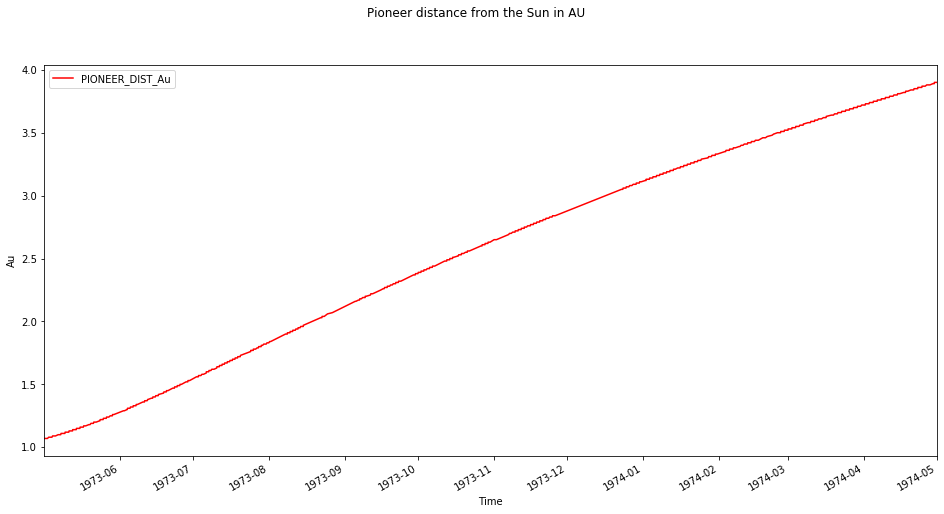

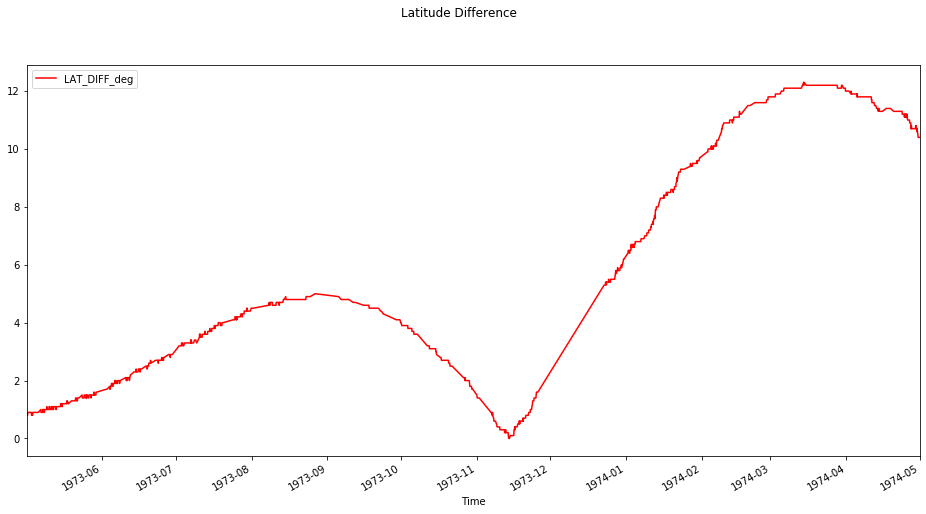

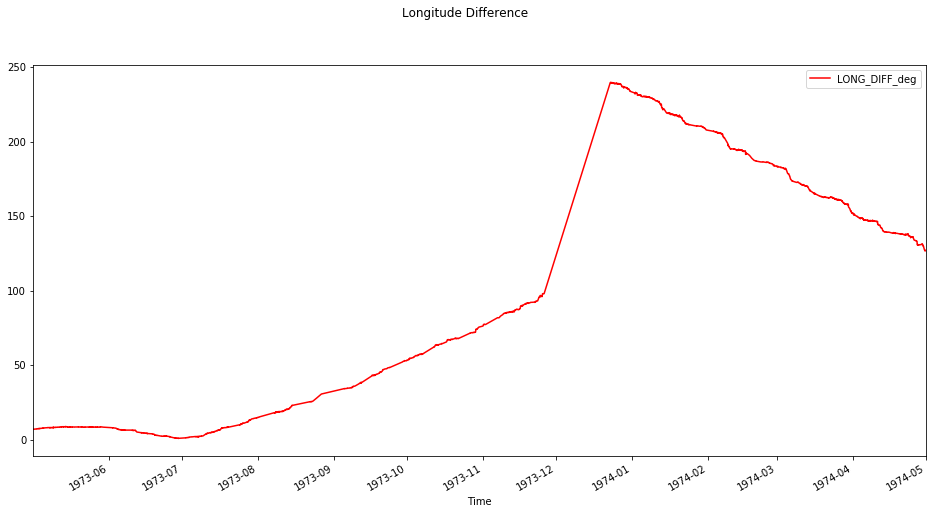

In [7]:
mF0['LAT_DIFF_deg'] = mF0.apply(lambda row: abs(row.OMNI_LAT_deg - row.PIONEER_LAT_deg), axis = 1)
mF0['LONG_DIFF_deg'] = mF0.apply(lambda row: abs(row.OMNI_LONG_deg - row.PIONEER_LONG_deg), axis = 1) 
mF0['SCALED_PIONEER_DENSITY'] = mF0.apply(lambda row: row.PIONEER_DENSITY_Ncm3 * row.PIONEER_DIST_Au * row.PIONEER_DIST_Au, axis = 1)
mF0['SCALED_PIONEER_MAG_AVG'] = mF0.apply(lambda row: row.PIONEER_MAG_AVG_nT * row.PIONEER_DIST_Au, axis = 1)

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
plt.ylabel("Km/s")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Pioneer density compared with OMNI density")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='SCALED_PIONEER_DENSITY', ax=ax)
plt.ylabel("N/cc")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='SCALED_PIONEER_MAG_AVG', ax=ax)
plt.ylabel("nT")

fig4 = plt.figure(figsize=(16, 8))
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='PIONEER_DIST_Au', color='red', ax=ax)
plt.ylabel("Au")

fig5 = plt.figure(figsize=(16, 8))
fig5.suptitle("Latitude Difference")
az = plt.gca()
mF0.plot(kind='line', x='Time', y='LAT_DIFF_deg', color='red', ax=az)


fig6 = plt.figure(figsize=(16, 8))
fig6.suptitle("Longitude Difference")
az = plt.gca()
mF0.plot(kind='line', x='Time', y='LONG_DIFF_deg', color='red', ax=az)

Here are the difference plots for Longitude, Latitude, and Distance.

Text(0, 0.5, 'nT Difference')

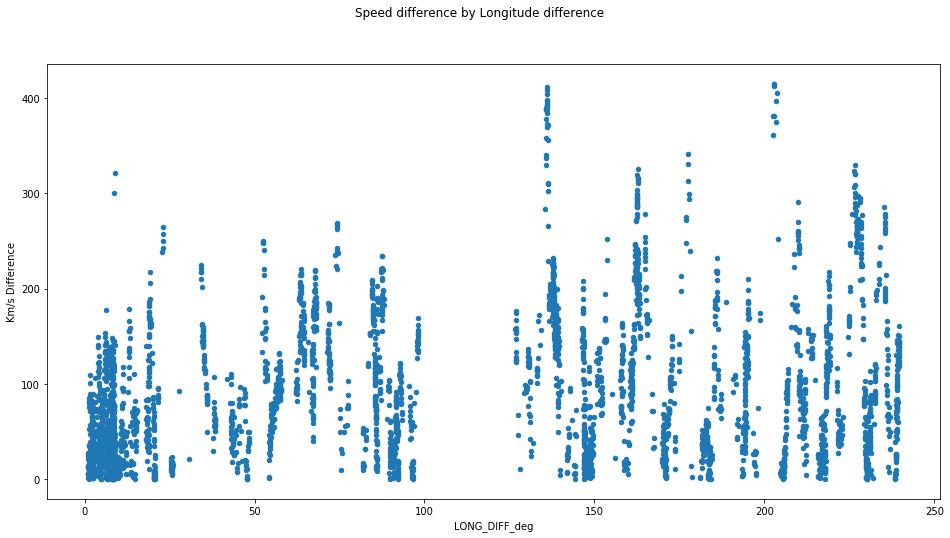

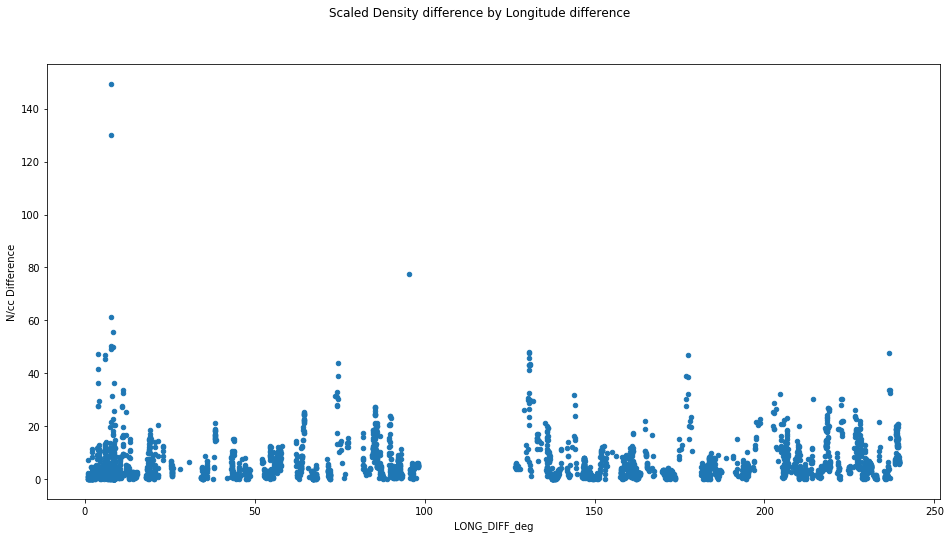

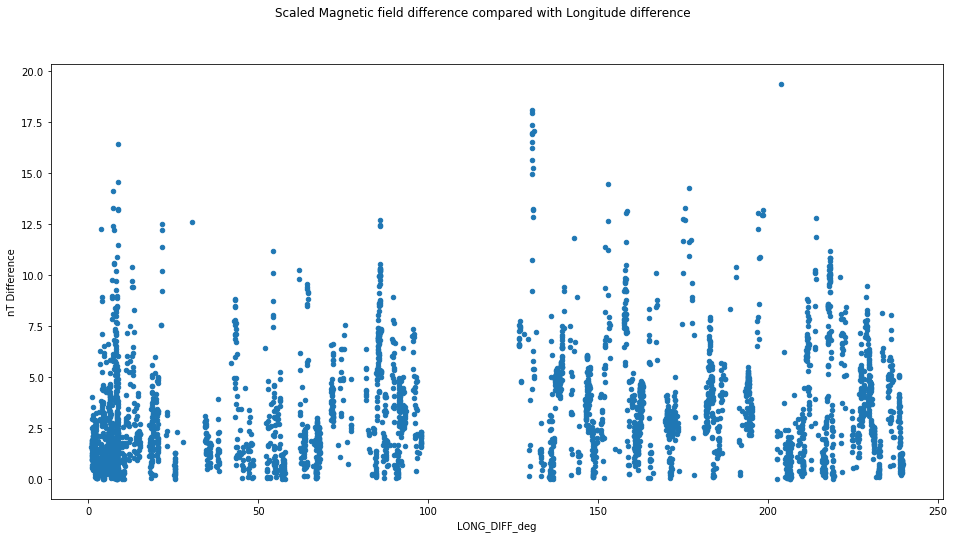

In [8]:
mF0['Speed_DIFF_Kms'] = mF0.apply(lambda row: abs(row.OMNI_SPEED_kms - row.PIONEER_SPEED_kms), axis = 1)
mF0['Density_DIFF_Ncc'] = mF0.apply(lambda row: abs(row.OMNI_DENSITY_Ncm3 - row.SCALED_PIONEER_DENSITY), axis = 1)
mF0['Mag_DIFF_nT'] = mF0.apply(lambda row: abs(row.OMNI_MAG_AVG_nT - row.SCALED_PIONEER_MAG_AVG), axis = 1)

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Longitude difference")
ax = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Longitude difference")
ay = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Longitude difference")
az = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

Text(0, 0.5, 'nT Difference')

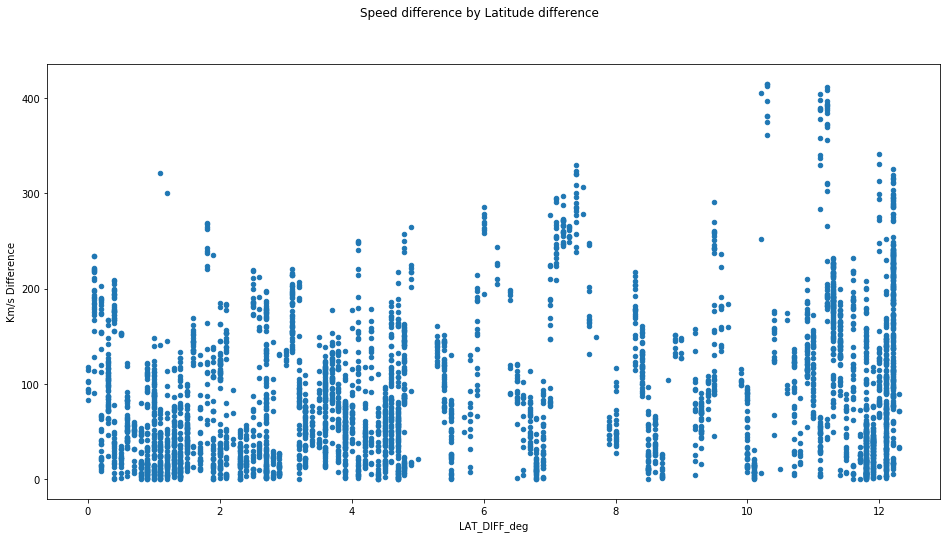

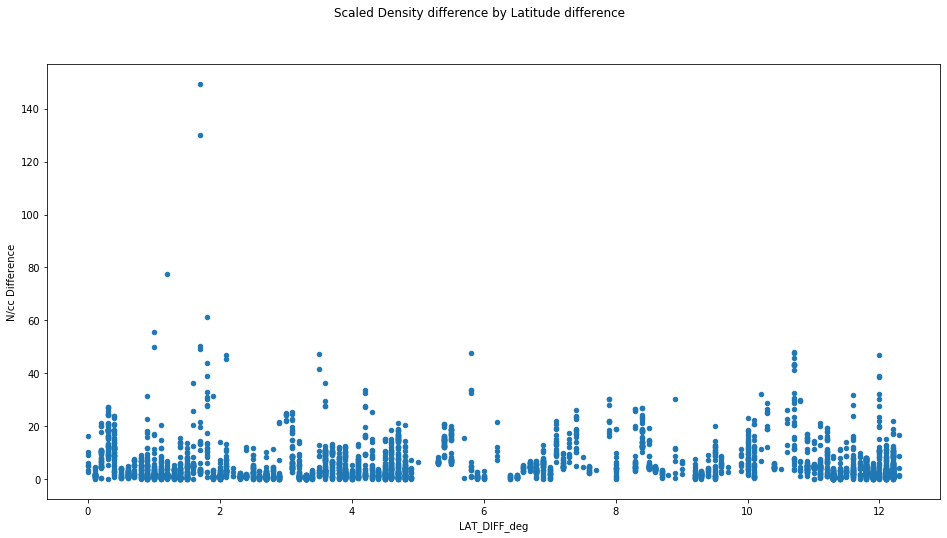

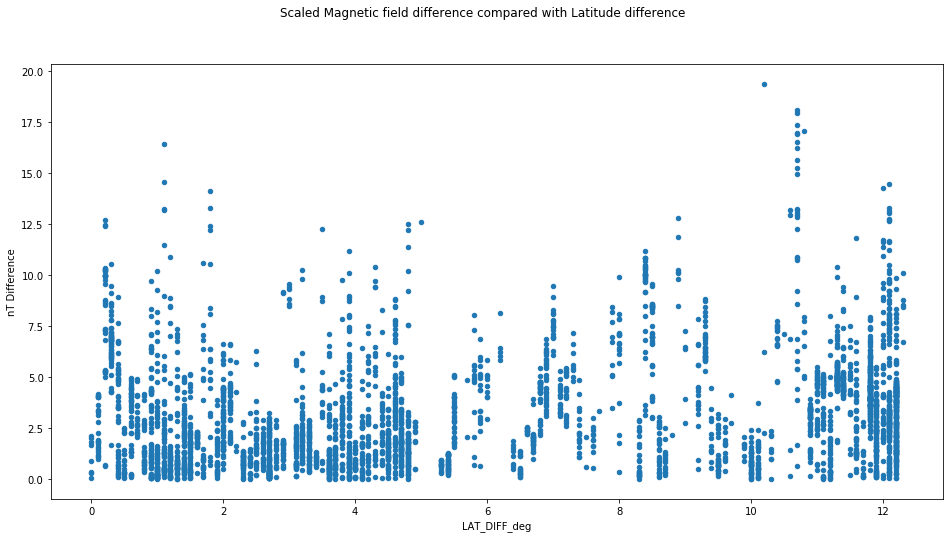

In [9]:
fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Latitude difference")
ax = plt.gca()
mF0.plot(kind='scatter', x='LAT_DIFF_deg', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Latitude difference")
ay = plt.gca()
mF0.plot(kind='scatter', x='LAT_DIFF_deg', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Latitude difference")
az = plt.gca()
mF0.plot(kind='scatter', x='LAT_DIFF_deg', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

Text(0, 0.5, 'nT Difference')

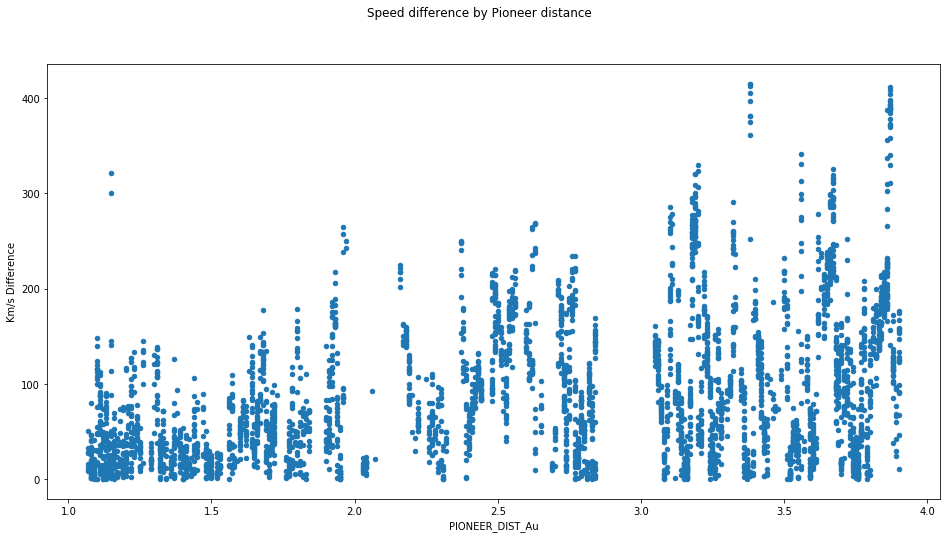

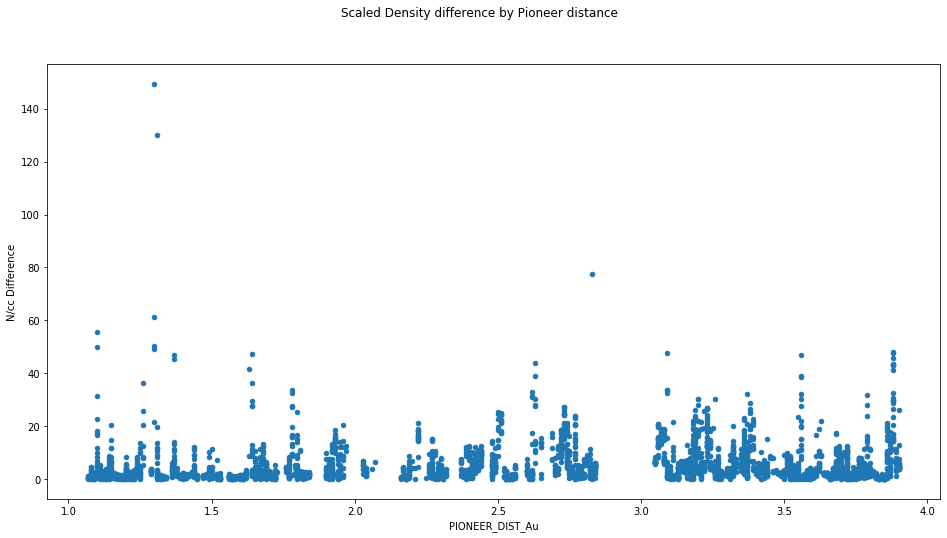

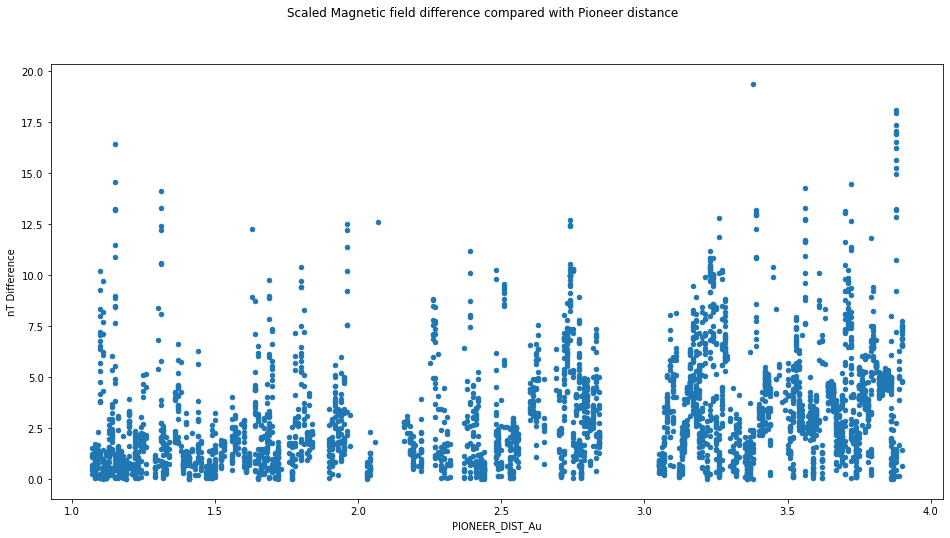

In [10]:
fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Pioneer distance")
ax = plt.gca()
mF0.plot(kind='scatter', x='PIONEER_DIST_Au', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Pioneer distance")
ay = plt.gca()
mF0.plot(kind='scatter', x='PIONEER_DIST_Au', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Pioneer distance")
az = plt.gca()
mF0.plot(kind='scatter', x='PIONEER_DIST_Au', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

#mF0.to_csv('Pioneer1Year2.csv')

In summary, I think the take-away from the Pioneer data is that taking a more naive approach to time shifting data is possible, but it works much better on data without much difference in terms of Latitude. My reccomendation for furthering this approach would be to focus on finding data with a small difference in terms of Latitude from the OMNI dataset.